In [66]:
%matplotlib inline
import numpy as np
import pandas as pd

np.random.seed(29)

### 1) How likely is it that you roll doubles when rolling two dice?

In [2]:
n_trials = nrows = 10**5
n_dice = ncols = 2

In [3]:
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [5, 6],
       [5, 5],
       [6, 5]])

In [4]:
#create a dataframe to get columns for rolls

rolls = (pd.DataFrame(rolls))

In [5]:
rolls.head()

,0,1
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1


In [6]:
rolls.columns

RangeIndex(start=0, stop=2, step=1)

In [7]:
#name the columns (roll vs roll2)
rolls.columns = ['rolls1','rolls2']

In [8]:
rolls.head()

,rolls1,rolls2
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1


In [9]:
#find the average of doubles rolled
(rolls.rolls1 == rolls.rolls2).mean()

0.16645

note: this makes sense as the probablity of two dice rolls being doubles as a 6:36 chance (6 sided dice X 6) and 0.16 = 1/6

### 2) If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [10]:
n_trials = nrows = 10 **5
n_dice = ncols = 8 # for flipping 8 coins at once

In [11]:
toss = np.random.choice([0, 1], n_trials * n_dice).reshape(nrows, ncols)
toss

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
#create a dataframe to get columns for rolls

coin_toss = (pd.DataFrame(toss))
coin_toss.shape

(100000, 8)

In [13]:
coin_toss.head()

,0,1,2,3,4,5,6,7
0,1,0,0,1,1,1,0,0
1,0,0,1,1,1,0,1,1
2,0,0,1,0,1,0,0,0
3,0,0,1,1,1,1,0,0
4,1,1,1,0,0,0,1,1


In [14]:
coin_toss.columns

RangeIndex(start=0, stop=8, step=1)

In [15]:
coin_toss.columns = ['t1','t2','t3','t4','t5','t6','t7','t8']

In [16]:
coin_toss.columns

Index(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8'], dtype='object')

In [17]:
coin_toss.sum(axis=1) 

0        4
1        5
2        2
3        4
4        5
        ..
99995    5
99996    4
99997    3
99998    3
99999    3
Length: 100000, dtype: int64

In [18]:
coin_toss.sum(axis=1) == 3

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997     True
99998     True
99999     True
Length: 100000, dtype: bool

In [19]:
(coin_toss.sum(axis=1) == 3).mean()

0.2188

#### ANSWER: a 0.22 probability rate

In [48]:
# What's the probability of getting more than 3 heads?
(coin_toss.sum(axis=1) > 3).mean()

0.63588

In [20]:
### (toss.sum(axis=1) == 3).mean() note: IF I want an array, I could just run everything that is not part or or named the df and call as the array

### 3) There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [59]:
n_rows= 10_000
n_cols= 2 # for 2 billboards

billboards = np.random.choice(['Web Development', 'Data Science'], p=[.75, .25], size=(n_rows, n_cols))
billboards = pd.DataFrame(billboards)

In [60]:
billboards #to see our df

,0,1
0,Web Development,Web Development
1,Web Development,Web Development
2,Data Science,Web Development
3,Web Development,Data Science
4,Web Development,Web Development
...,...,...
9995,Web Development,Web Development
9996,Web Development,Web Development
9997,Data Science,Web Development
9998,Web Development,Web Development


In [61]:
billboards ['number_of_data_science'] = (billboards == 'Data Science').sum(axis=1)
#created a new column that only counts True or False for ds students

(billboards.number_of_data_science == 2).mean()
#if both billboards are True, it equals 2

0.0646

#### ANSWER: a probablity of 0.06

### 4) Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [26]:
avg_tarts=3

days = ncols = 5
ntrials = nrows = 10**5

In [27]:

poptarts = np.random.normal(3, 1.5, size =(nrows, ncols)).round()
poptarts

array([[ 2.,  4.,  5.,  4.,  3.],
       [-1.,  3.,  4.,  4.,  2.],
       [ 1.,  3.,  5.,  5.,  2.],
       ...,
       [ 5.,  2.,  6.,  5.,  2.],
       [ 4.,  2.,  2.,  2.,  2.],
       [ 1.,  2.,  4.,  4.,  3.]])

In [28]:
(poptarts.sum(axis=1) < 17).mean()

##note: can apply an absolute to make the dataset be only positive numbers (as the direction of poptart inventory is forward)

0.67159

#### ANSWER: 0.67 probability

### 5) Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.

Since you have means and standard deviations, you can use np.random.normal to generate observations.

If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [63]:
m_heights = np.random.normal(178, 8, size=10_000)
f_heights = np.random.normal(170, 6, size=10_000)
(f_heights > m_heights).mean()

0.2104

#### ANSWER: there is a probability of 0.21 for the woman selected to be taller than the man selected

___________________________________________________________________

### 6) When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 

- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

- What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [69]:
#Probability of NO install issues
n_rows = 100_000
n_columns = 50

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))

(installs.sum(axis=1) == 50).mean()

0.81695

In [71]:
#Probability of NO install issues with 100 students
n_columns=100

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))
(installs.sum(axis=1) == 100).mean()

0.67244

In [72]:
#Probability of NO install issues with 150 students

n_columns=150
installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))
(installs.sum(axis=1) == 150).mean()

0.54808

In [74]:
#Probability of 450 students having NO install issues?

n_columns=450
installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))
(installs.sum(axis=1) == 450).mean()

0.16696

#### ANSWER: 
- for 50 students with no download errors there is a <b> 0.82 probability </b>
- for 100 students, <b> 0.67 probability </b>
- for 150 students where there IS NO installation issue, <b> 0.55 probability</b>
- for 450 students where there IS NO installation issue, <b> 0.17 probability</b>

_________________________________________________________________

### 7) There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days.

- How unlikely is this?

- How likely is it that a food truck will show up sometime this week?

In [75]:
n_rows=10_000
n_cols=3 #represents 3 days in a row

trucks = np.random.choice([1,0], size =(n_rows, n_cols), p = [0.7, 0.3])

In [76]:
#What is the probability of not seeing a food truck in 3 days?
(trucks.sum(axis=1) == 0).mean()

0.0258

In [77]:
#What is the probability of seeing a food truck in the next 2 days? (5 day workweek)
# Remember: food truck presence is independant
n_cols = 2 #for 2 days in a row

trucks = np.random.choice([1,0], size =(n_rows, n_cols), p = [0.7, 0.3])
(trucks.sum(axis=1) > 0).mean()

0.9111

#### ANSWER: 
- It is 0.03 probability unlikely that there is not a truck
- It is 0.91 probability likely that a truck will show this week. 

_______________________________________________________________________

### 8) If 23 people are in the same room, what are the odds that two of them share a birthday? 
- What if it's 20 people? 
- 40?

In [78]:
n_rows = 10_000
n_cols = 23 

birthdays = np.random.choice(range(365), size = (n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays['n_unique']=birthdays.nunique(axis=1)

In [79]:
(birthdays.n_unique != 23).mean()

0.5023

ANSWER:  0.50 probability of 2 people out of 23 to share the same birthday

In [80]:
#What is the probability of two people having same birthday in a room of 20 people?
n_rows = 10_000
n_cols = 20 

birthdays = np.random.choice(range(365), size = (n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays['n_unique']=birthdays.nunique(axis=1)

(birthdays.n_unique != 20).mean()

0.4159

ANSWER:  0.42 probability of 2 people out of 20 to share the same birthday

In [81]:
#What is the probability out of 40 people?
n_rows = 10_000
n_cols = 40 

birthdays = np.random.choice(range(365), size = (n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays['n_unique']=birthdays.nunique(axis=1)

(birthdays.n_unique != 40).mean()

0.8886

ANSWER:  0.89 probability of 2 people out of 40 to share the same birthday

In [83]:
### Graph this out....

#What if there are rooms of increasing size?

x=range(1,100)

#N will be a list of N for each room size
N = [n * (n-1) / 2 for n in x]

#Get the probability for each N
y = [1-(364/365)**n for n in N]

Text(0, 0.5, 'Probability')

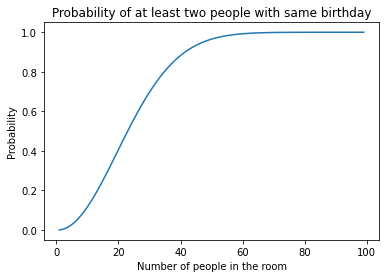

In [86]:
import matplotlib.pyplot as plt

plt.title('Probability of at least two people with same birthday')
plt.plot(x,y)
plt.xlabel("Number of people in the room")
plt.ylabel("Probability")